#### [T-Academy X KaKr] 성인 인구조사 소득 예측 대회
#### https://www.kaggle.com/c/kakr-4th-competition

- id
- age : 나이
- workclass : 고용 형태
- fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
- education : 교육 수준
- education_num : 교육 수준 수치
- marital_status: 결혼 상태
- occupation : 업종
- relationship : 가족 관계
- race : 인종
- sex : 성별
- capital_gain : 양도 소득
- capital_loss : 양도 손실
- hours_per_week : 주당 근무 시간
- native_country : 국적
- income : 수익 (예측해야 하는 값)
- \>50K : 1
- <=50K : 0

##### EDA 분석 참고 링크 https://3months.tistory.com/325

------------

In [42]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

In [20]:
train = pd.read_csv("C:/Users/junyoon/Desktop/jun/Kaggle/train.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


In [5]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


In [6]:
train.isnull().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

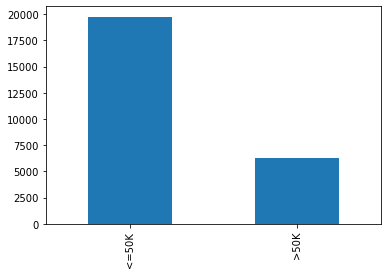

In [7]:
train['income'].value_counts().plot(kind='bar')

In [21]:
train = train.drop('id', axis=1)

In [9]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


In [22]:
train.loc[train['income'] == '>50K','income'] = '1'
train.loc[train['income'] == '<=50K','income'] = '0'

In [23]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1
1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,0
2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,0
3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,0
4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,0


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26049 non-null  int64 
 1   workclass       26049 non-null  object
 2   fnlwgt          26049 non-null  int64 
 3   education       26049 non-null  object
 4   education_num   26049 non-null  int64 
 5   marital_status  26049 non-null  object
 6   occupation      26049 non-null  object
 7   relationship    26049 non-null  object
 8   race            26049 non-null  object
 9   sex             26049 non-null  object
 10  capital_gain    26049 non-null  int64 
 11  capital_loss    26049 non-null  int64 
 12  hours_per_week  26049 non-null  int64 
 13  native_country  26049 non-null  object
 14  income          26049 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.0+ MB


In [26]:
train['age'].unique()

array([40, 17, 18, 21, 24, 43, 37, 47, 41, 34, 44, 50, 39, 32, 54, 26, 29,
       53, 31, 46, 23, 20, 22, 27, 51, 57, 25, 76, 38, 66, 64, 58, 45, 52,
       67, 65, 35, 19, 68, 28, 33, 36, 63, 62, 42, 59, 49, 30, 56, 48, 61,
       60, 55, 72, 69, 74, 81, 71, 84, 70, 80, 78, 90, 79, 75, 73, 83, 82,
       85, 77, 87, 88, 86], dtype=int64)

In [28]:
train['workclass'].unique() # 특

array(['Private', 'State-gov', '?', 'Self-emp-not-inc', 'Local-gov',
       'Federal-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [33]:
train['fnlwgt'].unique()
train['fnlwgt'].value_counts()

203488    11
123011    10
121124    10
126675    10
117963    10
          ..
177839     1
519627     1
157599     1
200360     1
125489     1
Name: fnlwgt, Length: 18422, dtype: int64

In [34]:
train['education'].unique()

array(['HS-grad', '9th', 'Some-college', 'Bachelors', '11th', '1st-4th',
       '5th-6th', 'Assoc-acdm', '10th', 'Prof-school', '7th-8th',
       'Masters', 'Assoc-voc', 'Doctorate', '12th', 'Preschool'],
      dtype=object)

In [41]:
train['education_num'].unique()

array([ 9,  5, 10, 13,  7,  2,  3, 12,  6, 15,  4, 14, 11, 16,  8,  1],
      dtype=int64)

(array([ 174.,  265.,  923.,  731., 1281., 8433., 6896.,  842., 5722.,
         782.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

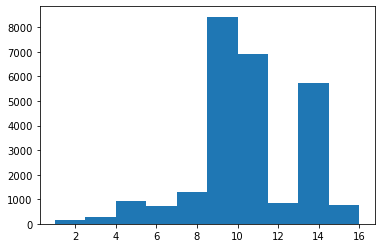

In [43]:
plt.hist(train['education_num'])

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26049 non-null  int64 
 1   workclass       26049 non-null  object
 2   fnlwgt          26049 non-null  int64 
 3   education       26049 non-null  object
 4   education_num   26049 non-null  int64 
 5   marital_status  26049 non-null  object
 6   occupation      26049 non-null  object
 7   relationship    26049 non-null  object
 8   race            26049 non-null  object
 9   sex             26049 non-null  object
 10  capital_gain    26049 non-null  int64 
 11  capital_loss    26049 non-null  int64 
 12  hours_per_week  26049 non-null  int64 
 13  native_country  26049 non-null  object
 14  income          26049 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.0+ MB


In [100]:
train[(train['income']=='1')&(train["education_num"]==2)]["education_num"].value_counts()

2    5
Name: education_num, dtype: int64

In [102]:
len(train[(train['income']=='1')&(train["education_num"]==2)])

5

In [165]:
df0=[]
df1=[]
df2=[]

for i in range(1,17):
    a0=int(len(train[(train["education_num"]==i)&(train['income']=='0')]))
    a1=int(len(train[(train["education_num"]==i)&(train['income']=='1')]))
    a2=round(a1/(a0+a1)*100,2)
    df0.append(a0)
    df1.append(a1)
    df2.append(a2)
  
df=pd.DataFrame(np.array([id,df0, df1,df2]), index=["가","나","다","마"]).transpose()
#(np.array([df0,df1,df2]))
print(df)

       가       나       다      마
0    1.0    40.0     0.0   0.00
1    2.0   129.0     5.0   3.73
2    3.0   252.0    13.0   4.91
3    4.0   476.0    29.0   5.74
4    5.0   396.0    22.0   5.26
5    6.0   678.0    53.0   7.25
6    7.0   867.0    55.0   5.97
7    8.0   333.0    26.0   7.24
8    9.0  7096.0  1337.0  15.85
9   10.0  4683.0  1117.0  19.26
10  11.0   816.0   280.0  25.55
11  12.0   627.0   215.0  25.53
12  13.0  2539.0  1805.0  41.55
13  14.0   604.0   774.0  56.17
14  15.0   124.0   342.0  73.39
15  16.0    84.0   232.0  73.42


In [107]:
id=train["education_num"].unique().sort()

array([ 9,  5, 10, 13,  7,  2,  3, 12,  6, 15,  4, 14, 11, 16,  8,  1],
      dtype=int64)

In [110]:
id=sorted(train["education_num"].unique())

In [99]:
def bar_chart(feature):
    over_50K = train[(train['income']=='1')&(train[feature]==2)][feature].value_counts()
    under_50K = train[(train['income']=='0')&(train[feature]==2)][feature].value_counts()
    
    df = pd.DataFrame([over_50K, under_50K]

#     df.index = ['OVER 50,000$', 'UNDER 50,000$']
#     df.plot(kind='bar', stacked=True, figsize=(10,5))

SyntaxError: unexpected EOF while parsing (<ipython-input-99-2d0cb2411afa>, line 8)

In [103]:
# bar_chart('education_num')

In [84]:
train['income']=='1'

0         True
1        False
2        False
3        False
4        False
         ...  
26044    False
26045    False
26046    False
26047    False
26048    False
Name: income, Length: 26049, dtype: bool

In [87]:
aa=train[train['income']=='1']

In [88]:
aa[feature]

NameError: name 'feature' is not defined

In [83]:
train['education_num']==5

0        False
1         True
2        False
3        False
4        False
         ...  
26044    False
26045    False
26046    False
26047    False
26048    False
Name: education_num, Length: 26049, dtype: bool